In [41]:
from binance_historical_data import BinanceDataDumper

data_dumper = BinanceDataDumper(
    path_dir_where_to_dump=".",
    asset_class="spot",  # spot, um, cm
    data_type="klines",  # aggTrades, klines, trades
    data_frequency="1m",
)

print(data_dumper.get_list_all_trading_pairs())

['ETHBTC', 'LTCBTC', 'BNBBTC', 'NEOBTC', 'QTUMETH', 'EOSETH', 'SNTETH', 'BNTETH', 'BCCBTC', 'GASBTC', 'BNBETH', 'BTCUSDT', 'ETHUSDT', 'HSRBTC', 'OAXETH', 'DNTETH', 'MCOETH', 'ICNETH', 'MCOBTC', 'WTCBTC', 'WTCETH', 'LRCBTC', 'LRCETH', 'QTUMBTC', 'YOYOBTC', 'OMGBTC', 'OMGETH', 'ZRXBTC', 'ZRXETH', 'STRATBTC', 'STRATETH', 'SNGLSBTC', 'SNGLSETH', 'BQXBTC', 'BQXETH', 'KNCBTC', 'KNCETH', 'FUNBTC', 'FUNETH', 'SNMBTC', 'SNMETH', 'NEOETH', 'IOTABTC', 'IOTAETH', 'LINKBTC', 'LINKETH', 'XVGBTC', 'XVGETH', 'SALTBTC', 'SALTETH', 'MDABTC', 'MDAETH', 'MTLBTC', 'MTLETH', 'SUBBTC', 'SUBETH', 'EOSBTC', 'SNTBTC', 'ETCETH', 'ETCBTC', 'MTHBTC', 'MTHETH', 'ENGBTC', 'ENGETH', 'DNTBTC', 'ZECBTC', 'ZECETH', 'BNTBTC', 'ASTBTC', 'ASTETH', 'DASHBTC', 'DASHETH', 'OAXBTC', 'ICNBTC', 'BTGBTC', 'BTGETH', 'EVXBTC', 'EVXETH', 'REQBTC', 'REQETH', 'VIBBTC', 'VIBETH', 'HSRETH', 'TRXBTC', 'TRXETH', 'POWRBTC', 'POWRETH', 'ARKBTC', 'ARKETH', 'YOYOETH', 'XRPBTC', 'XRPETH', 'MODBTC', 'MODETH', 'ENJBTC', 'ENJETH', 'STORJBTC', 'ST

In [42]:
data_dumper.dump_data(tickers=["NEARUSDT"])

Tickers:   0%|          | 0/1 [00:00<?, ?it/s]

monthly files to download: 0files [00:00, ?files/s]

daily files to download: 0files [00:00, ?files/s]

In [43]:
import pandas as pd
import numpy as np
import os

filenames = next(os.walk("./spot/monthly/klines/NEARUSDT/5m"), (None, None, []))[2]  # [] if no file

columns = [
    "Open time",
    "Open",
    "High",
    "Low",
    "Close",
    "Volume",
    "Close time",
    "Quote asset volume",
    "Number of trades",
    "Taker buy base asset volume",
    "Taker buy quote asset volume",
    "Ignore"
]

df = pd.DataFrame(columns=columns)

for f in filenames:
    new_df = pd.read_csv(f"./spot/monthly/klines/NEARUSDT/5m/{f}", header=None, names=columns)
    df = pd.concat([df, new_df])
df = df.sort_values(by="Open time")
df

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,1602651600000,1.3000,1.8800,1.1111,1.230,3553419.13,1602651899999,4.917631e+06,5556,1752338.82,2.344665e+06,0
1,1602651900000,1.2297,1.4381,1.1997,1.385,1195063.22,1602652199999,1.612363e+06,2563,701872.47,9.512006e+05,0
2,1602652200000,1.3844,1.4700,1.3207,1.367,924947.36,1602652499999,1.299402e+06,2292,565162.25,7.964966e+05,0
3,1602652500000,1.3670,1.3735,1.2222,1.250,939401.68,1602652799999,1.217898e+06,2022,429442.49,5.606299e+05,0
4,1602652800000,1.2450,1.3301,1.2428,1.330,684694.81,1602653099999,8.881953e+05,1246,424396.12,5.507958e+05,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8923,1690846500000,1.3700,1.3710,1.3700,1.371,6809.30,1690846799999,9.330363e+03,41,4096.80,5.613781e+03,0
8924,1690846800000,1.3700,1.3730,1.3700,1.373,5623.90,1690847099999,7.717850e+03,56,4394.90,6.030549e+03,0
8925,1690847100000,1.3730,1.3730,1.3710,1.372,3748.30,1690847399999,5.141087e+03,34,2131.10,2.922604e+03,0
8926,1690847400000,1.3720,1.3720,1.3710,1.371,5760.90,1690847699999,7.899320e+03,18,2300.40,3.153848e+03,0


In [44]:
col = [
    "Open",
    "High",
    "Low",
    "Close",
    "Volume",
    "Quote asset volume"]
dataset = df.loc[:, col].astype(np.float64)
dataset = pd.DataFrame(dataset.to_numpy(), columns=col)
dataset

,Open,High,Low,Close,Volume,Quote asset volume
0,1.3000,1.8800,1.1111,1.230,3553419.13,4.917631e+06
1,1.2297,1.4381,1.1997,1.385,1195063.22,1.612363e+06
2,1.3844,1.4700,1.3207,1.367,924947.36,1.299402e+06
3,1.3670,1.3735,1.2222,1.250,939401.68,1.217898e+06
4,1.2450,1.3301,1.2428,1.330,684694.81,8.881953e+05
...,...,...,...,...,...,...
293700,1.3700,1.3710,1.3700,1.371,6809.30,9.330363e+03
293701,1.3700,1.3730,1.3700,1.373,5623.90,7.717850e+03
293702,1.3730,1.3730,1.3710,1.372,3748.30,5.141087e+03
293703,1.3720,1.3720,1.3710,1.371,5760.90,7.899320e+03


In [45]:
difference_dataset = dataset.diff().dropna().reset_index(drop=True)
difference_dataset[-256:]

,Open,High,Low,Close,Volume,Quote asset volume
293448,-0.004,-0.001,0.000,0.003,8122.7,11469.8176
293449,0.002,0.000,0.003,0.000,-9100.6,-12854.0153
293450,0.000,0.000,-0.001,-0.001,6947.8,9835.2911
293451,-0.001,0.000,0.000,0.001,-4824.9,-6834.3102
293452,0.001,-0.001,-0.001,-0.001,2347.8,3319.5803
...,...,...,...,...,...,...
293699,0.002,0.001,0.002,0.001,-2482.7,-3390.1483
293700,0.000,0.002,0.000,0.002,-1185.4,-1612.5133
293701,0.003,0.000,0.001,-0.001,-1875.6,-2576.7628
293702,-0.001,-0.001,0.000,-0.001,2012.6,2758.2332


<Axes: xlabel='time'>

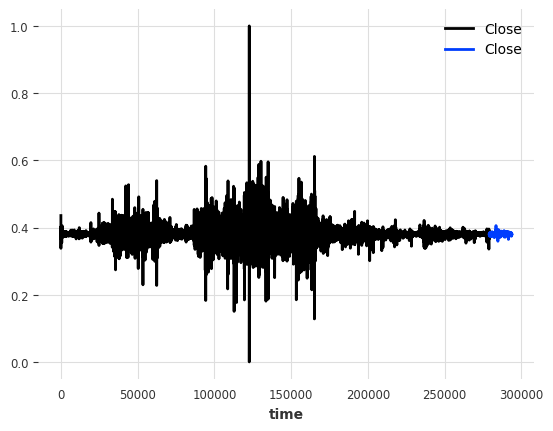

In [46]:
import numpy as np
import pandas as pd

from darts import TimeSeries
from darts.dataprocessing import Pipeline
from darts.dataprocessing.transformers import Scaler, InvertibleMapper
from darts.models import RNNModel, TFTModel
from darts.metrics import mape, mase
from darts.utils.likelihood_models import GaussianLikelihood

import warnings

warnings.filterwarnings("ignore")
import logging

logging.disable(logging.CRITICAL)

target_series = TimeSeries.from_dataframe(difference_dataset)

abslog = InvertibleMapper(fn=lambda x: np.sign(x) * np.log1p(np.abs(x)),
                          inverse_fn=lambda x: np.sign(x) * (np.exp(np.abs(x)) - 1))
scaler = Scaler()
pipeline = Pipeline([abslog, scaler])

target_series = pipeline.fit_transform(target_series)

target_train, target_val = target_series.split_after(0.95)

target_train["Close"].plot()
target_val["Close"].plot()

In [47]:
SEQUENCE_LENGTH = 128
PREDICTION_LENGTH = 32
# my_model = RNNModel(
#     model="LSTM",
#     hidden_dim=32,
#     n_rnn_layers=4,
#     dropout=0.2,
#     batch_size=128,
#     n_epochs=10,
#     optimizer_kwargs={"lr": 1e-3},
#     random_state=0,
#     training_length=SEQUENCE_LENGTH,
#     input_chunk_length=SEQUENCE_LENGTH,
#     likelihood=GaussianLikelihood(),
# )

my_model = TFTModel(
    input_chunk_length=SEQUENCE_LENGTH,
    output_chunk_length=PREDICTION_LENGTH,
    hidden_size=64,
    lstm_layers=1,
    num_attention_heads=4,
    dropout=0.1,
    batch_size=128,
    n_epochs=300,
    add_relative_index=True,
    add_encoders=None,
    random_state=42,
)

my_model.fit(target_train, val_series=target_val, verbose=True)

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

TFTModel(hidden_size=64, lstm_layers=1, num_attention_heads=4, full_attention=False, feed_forward=GatedResidualNetwork, dropout=0.1, hidden_continuous_size=8, categorical_embedding_sizes=None, add_relative_index=True, loss_fn=None, likelihood=None, norm_type=LayerNorm, use_static_covariates=True, input_chunk_length=128, output_chunk_length=32, batch_size=128, n_epochs=300, add_encoders=None, random_state=42)

In [48]:
average_error = my_model.backtest(
    target_val,
    forecast_horizon=PREDICTION_LENGTH,
    # metric=mase,
    verbose=False,
    retrain=False,
    num_samples=8,
    start=0.8,
    # stride=5,
)

print("Average error (MAPE) over validation forecasts: %.2f" % average_error)

Average error (MAPE) over validation forecasts: 36.66


Predicting: 0it [00:00, ?it/s]

<Axes: xlabel='time'>

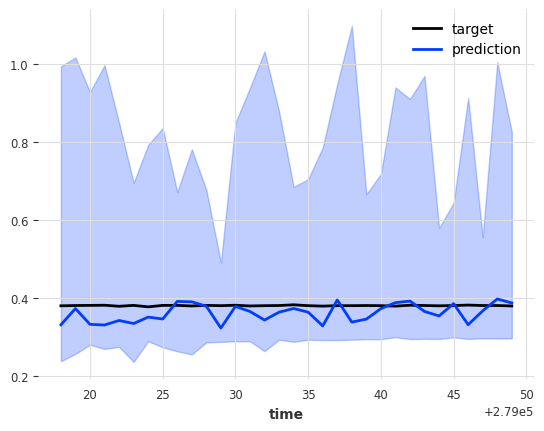

In [49]:
predict_X = target_train[-SEQUENCE_LENGTH:]
pred: TimeSeries = my_model.predict(PREDICTION_LENGTH, predict_X, num_samples=50)

target_val["Close"].slice_intersect(pred["Close"]).plot(label="target")
pred["Close"].plot(label="prediction")

In [50]:
def inverse_diff(original_start, x):
    x = x.to_numpy()
    reversed_array = np.zeros_like(x)
    reversed_array[0] = original_start + x[0]
    for i in range(1, x.shape[0]):
        reversed_array[i] = reversed_array[i - 1] + x[i]
    return reversed_array


original_start = dataset.iloc[predict_X[-1].time_index].to_numpy()

inverted_pred = pipeline.inverse_transform(pred)
inverted_pred = inverted_pred.mean().pd_dataframe()
inverted_pred[:] = inverse_diff(original_start, inverted_pred)
inverted_pred

component,Open,High,Low,Close,Volume,Quote asset volume
time,,,,,,
279018,1.277967,0.246446,1.231984,1.527582,3.183364e+08,5.959799e+07
279019,1.166342,-1.253374,1.423190,2.006729,4.908698e+08,1.172657e+08
279020,1.058735,-2.932255,1.508042,2.341494,1.403450e+09,5.012730e+07
279021,1.087421,-3.449734,1.648049,2.797294,1.770834e+09,3.408749e+07
279022,1.057560,-4.862986,1.757012,3.033029,3.736197e+09,3.628122e+06
279023,1.131205,-7.577622,1.871486,3.075314,5.896136e+09,-2.772177e+07
279024,1.169505,-7.999438,2.056050,3.254063,7.142191e+09,6.461276e+05
279025,1.065616,-9.604201,2.178256,3.470309,9.230804e+09,8.071546e+07
279026,1.202462,-9.920021,2.268911,3.690232,1.089639e+10,7.704245e+07


In [51]:
inverted_target = pipeline.inverse_transform(target_val).pd_dataframe()
inverted_target[:] = inverse_diff(original_start, inverted_target)
inverted_target = inverted_target[:PREDICTION_LENGTH]
inverted_target

component,Open,High,Low,Close,Volume,Quote asset volume
time,,,,,,
279018,1.203,1.204,1.196,1.198,42564.5,51180.2400
279019,1.202,1.204,1.198,1.199,48617.8,58468.0164
279020,1.202,1.205,1.199,1.201,39909.0,48053.7750
279021,1.204,1.208,1.202,1.204,41100.0,49558.5702
279022,1.206,1.208,1.200,1.200,69965.7,84194.2859
279023,1.203,1.206,1.201,1.202,29581.6,35684.8998
279024,1.205,1.206,1.195,1.194,65386.6,78540.5971
279025,1.198,1.201,1.195,1.196,33332.7,40122.0360
279026,1.199,1.202,1.197,1.198,31135.1,37506.0838


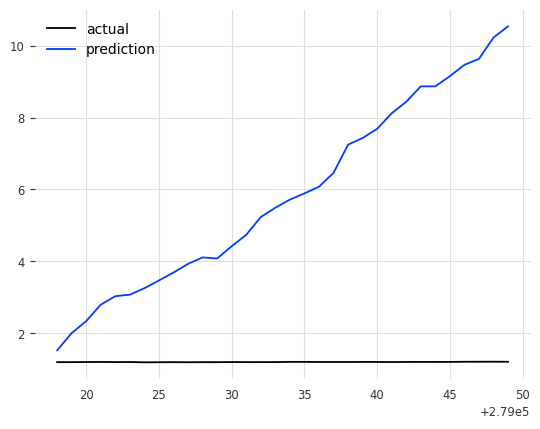

In [52]:
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# Create a DataFrame from the 'candlesticks' array
columns = ["Open", "High", "Low", "Close", "Volume", "Quote asset volume"]
candlesticks_df = pd.DataFrame(inverted_target, columns=columns)
candlesticks_pred_df = pd.DataFrame(inverted_pred, columns=columns)

plt.plot(candlesticks_df["Close"], label="actual")
plt.plot(candlesticks_pred_df["Close"], label="prediction")
plt.legend()

# Adding a fake date index (mplfinance needs this)
# candlesticks_df['Date'] = pd.date_range(start='1/1/2000', periods=candlesticks_df.shape[0])
# candlesticks_df['Date'] = candlesticks_df['Date'].apply(mdates.date2num)
# candlesticks_pred_df['Date'] = pd.date_range(start='1/1/2000', periods=candlesticks_pred_df.shape[0])
# candlesticks_pred_df['Date'] = candlesticks_pred_df['Date'].apply(mdates.date2num)
# 
# # Reordering columns to fit mplfinance requirements
# candlesticks_df = candlesticks_df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
# candlesticks_pred_df = candlesticks_pred_df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

# Plotting
# fig, ax = plt.subplots(figsize=(15, 10))

# candlestick_ohlc(ax, candlesticks_pred_df.values, width=0.6, colorup='lime', colordown='magenta', alpha=0.5)
# candlestick_ohlc(ax, candlesticks_df.values, width=0.6, colorup='g', colordown='r', alpha=0.5)

plt.show()